In [14]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
# plt.rcParams['axes.grid'] = True
# sns.set()


In [15]:
import sys
sys.path.insert(0, '..')
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm


from hypers import weight_hypers
from hypers import alpha_hypers
from draw import draw_all

In [16]:
series_type = "default"
from_start = False
a, b = -40, 40
train_window = 10

# Cоздание синтезатора, cпособного создавать workers_num наборов параметров, для каждого из которых генерировать временные ряды.
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
synt = Synthesizer(series_type, dim=10, low=-10, high=10, clip=(a, b),
                   noise_var=1, workers_num=3, random_seed=12)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(series_type, synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(length=1000, from_start=from_start, lower_bound=50, upper_bound=100, alternating=True)


In [17]:
# gen.show_time_series()

In [18]:
# gen.draw_merged()

In [19]:
gen.launch()
algo = Algorithm(series_type, gen, train_window=train_window, a=a, b=b, init_pretrained=False)
algo.run()
algo.post_calculations(from_start=from_start)

100%|████████████████████████████████████████████████████████████████████████| 1194/1194 [00:14<00:00, 81.45it/s]


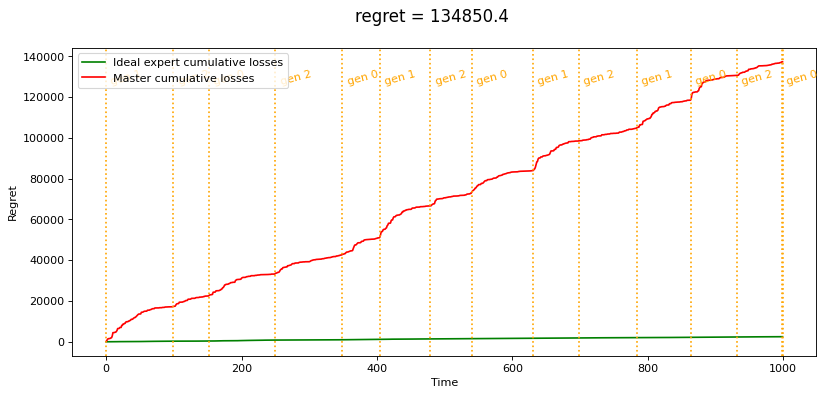

In [20]:
draw_all(algo, show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
                  suptitle=f"regret = {algo.regret:.1f}", fig_size=(12, 5))

In [21]:
losses = algo.experts_losses_all.sum(axis=0)[1:724]
np.argmin(losses)

695

In [ ]:
wh = weight_hypers["simple_1001"]

In [ ]:
gen.launch()
algo = Algorithm(series_type, gen, train_window=train_window, a=a, b=b, 
                 weights_func=wh.func, weight_const=wh.const, init_pretrained=False)
algo.run()
algo.post_calculations(from_start=from_start)

In [ ]:
draw_all(algo, show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
                  suptitle=f"regret = {algo.regret:.1f}", fig_size=(12, 5))

In [ ]:
algo.shift

In [ ]:
algo.master_losses_all[algo.shift]

In [ ]:
plt.plot(algo.master_losses_all)